# Introduction to Python and NumPy

## Installation

Our recommendation is to use [Miniconda](https://docs.anaconda.com/miniconda/) to manage your `Python` environment.
If you have not installed Miniconda or Anaconda yet, follow the installation instructions [here](https://docs.anaconda.com/miniconda/#quick-command-line-install).

As soon as you have installed Miniconda, you can create a new environment with the name `ml1` by running
```bash
conda create -n "ml1" python=3.11.5
```

After creating the environment, use the following command to activate it:
```bash
conda activate ml1
```

If you open this Jupyter notebook in VSCode, select the Python interpreter in the `ml1` conda environment in the upper right corner.
VSCode will then prompt you to install the `ipykernel` package, which you should install.

## IDEs

Recommended:

+ [Visual Studio Code](https://code.visualstudio.com/) (with the `Jupyter` and `Python` extensions)
+ [Jetbrains PyCharm](https://www.jetbrains.com/pycharm/) (The student version is totally sufficient for this course, but you can also get the professional edition for free with your university email (https://www.jetbrains.com/shop/eform/students).)

# Setup

In [1]:
%pip install "numpy==2.2.3" "matplotlib==3.10.1" "pandas==2.2.3" "scikit-learn==1.6.1"

Note: you may need to restart the kernel to use updated packages.


## Basics and Syntax

In [2]:
some_string = 'Hello World'
some_int = 42
some_float = 42.0
some_bool = True
some_list = [1, 2.0, 'three', 4, 5]
some_tuple = (3, 4)
some_dictionary = {'one': 1, 'two': 2} # key-value pairs of arbitrary type

In [3]:
# For Loop
for x in some_list:
    print(x)

1
2.0
three
4
5


In [4]:
# For Loop with index
for index, x in enumerate(some_list):
    print(f'{index}: {x}')

0: 1
1: 2.0
2: three
3: 4
4: 5


In [5]:
# Looping over key-value pairs
for key, value in some_dictionary.items():
    print(f'Key {key} maps to {value}')

Key one maps to 1
Key two maps to 2


In [6]:
some_list[0] # first element (0-indexing)

1

In [7]:
# some_list[0:2] # slicing from index 0 (inclusive) to index 2 (exclusive)
some_list[2:]
# this is the same as some_list[:2]

['three', 4, 5]

In [8]:
some_list.append(None) # special keyword None, similar to null or nullptr in other languages
some_list

[1, 2.0, 'three', 4, 5, None]

In [9]:
if some_list[0] == 1:
    print('this should be printed')
else:
    print('this should not be printed')

this should be printed


In [10]:
if some_list[-1] is not None:
    print('this should be printed')

# NumPy

https://numpy.org

+ "The fundamental package for scientific computing with Python"
+ Builds around N-dimensional arrays (i.e., tensors) of numbers (floats, ints, bools)
+ "Array computing", "Linear Algebra Programs"
+ **Extremely important in all of scientific computing**
+ Especially so in **Machine Learning**, **Deep Learning**, **Data Science**

In [11]:
import numpy as np

In [12]:
x = np.array([1, 3, 5]) # 1D numpy array
x 

array([1, 3, 5])

In [13]:
x.shape

(3,)

In [14]:
X = np.array([[1, 3, 5], [2, 4, 6]]) # 2D numpy array
X

array([[1, 3, 5],
       [2, 4, 6]])

In [15]:
X.shape

(2, 3)

In [16]:
A = np.ones((2, 3)) # There's also np.zeros
A

array([[1., 1., 1.],
       [1., 1., 1.]])

In [17]:
X + A # element-wise operation (+, -, *, /)

array([[2., 4., 6.],
       [3., 5., 7.]])

In [18]:
2 * X # multiplies *every element* in X by 2

array([[ 2,  6, 10],
       [ 4,  8, 12]])

In [19]:
# Let's transpose X
X_transposed = X.T
X_transposed

array([[1, 2],
       [3, 4],
       [5, 6]])

In [20]:
XtX = X_transposed @ X # matrix multiply
XtX

array([[ 5, 11, 17],
       [11, 25, 39],
       [17, 39, 61]])

## Matrix Aggregation

In [21]:
data = X.T
data

array([[1, 2],
       [3, 4],
       [5, 6]])


![title](https://jalammar.github.io/images/numpy/numpy-matrix-aggregation-1.png)

Source: https://jalammar.github.io/visual-numpy/

In [27]:
print(data.max()) 
print(data.min()) 
print(data.sum())

6
1
21


In [23]:
data = np.array([[1, 2], [5, 3], [4, 6]])
data

array([[1, 2],
       [5, 3],
       [4, 6]])


![title](https://jalammar.github.io/images/numpy/numpy-matrix-aggregation-4.png)

Source: https://jalammar.github.io/visual-numpy/

In [46]:
data.max(axis=0)

array([5, 6])

In [47]:
data.max(axis=1)

array([2, 5, 6])

## Matrix Indexing

In [48]:
data = X.T
data

array([[1, 2],
       [3, 4],
       [5, 6]])

![title](https://jalammar.github.io/images/numpy/numpy-matrix-indexing.png)

Source: https://jalammar.github.io/visual-numpy/

In [49]:
data[0:2, 0]

array([1, 3])

## Reshaping 

In [50]:
data = np.arange(1, 7)
data

array([1, 2, 3, 4, 5, 6])

![title](https://jalammar.github.io/images/numpy/numpy-reshape.png)

Source: https://jalammar.github.io/visual-numpy/

In [51]:
data.reshape(2, 3)

array([[1, 2, 3],
       [4, 5, 6]])

## Implementing the Mean Squared Error function

Let $\mathbf{y} = (y_1, \dots, y_n)^T$ and $\hat{\mathbf{y}} = (\hat{y}_1, \dots, \hat{y}_n)^T$.
The *mean squared error function* is given by
$$E(\mathbf{y}, \hat{\mathbf{y}}) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 $$

In [52]:
n = 10
y = np.random.rand(n)
y_hat = np.random.rand(n)

In [53]:
y

array([0.7365638 , 0.87770844, 0.19871295, 0.42170585, 0.15448153,
       0.15073716, 0.85158357, 0.77453339, 0.96532031, 0.36399087])

In [54]:
y_hat

array([0.59452946, 0.5597231 , 0.40741976, 0.09325194, 0.12827947,
       0.19319531, 0.17802322, 0.55471057, 0.01498024, 0.47347658])

In [55]:
E = np.mean((y - y_hat)**2)
E

0.16923571559635395

## Example: Image Dataset

We will use `matplotlib` for plotting and `sklearn` to import the image dataset.

In [28]:
from matplotlib import pyplot as plt

In [29]:
from sklearn import datasets
digits = datasets.load_digits()
data = digits.data

In [30]:
data.shape

(1797, 64)

In [31]:
data[0].shape

(64,)

In [32]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [33]:
data[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [34]:
data = data.reshape(1797, 8, 8) # we can also do data.reshape(-1, 8, 8)
data.shape # We can think of this as a collection of 1797 (8,8) matrices

(1797, 8, 8)

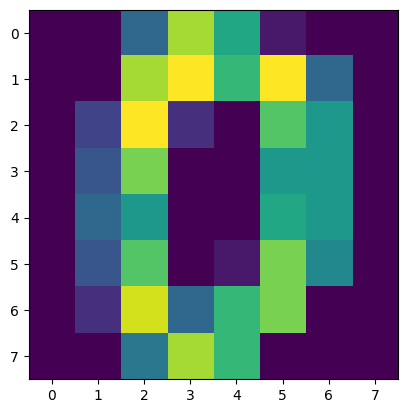

In [35]:
plt.imshow(data[0])

In [126]:
data[3, :, 1] # this would slice out the second column in image with index 3

array([0., 8., 2., 0., 0., 0., 0., 0.])

## Plotting with matplotlib

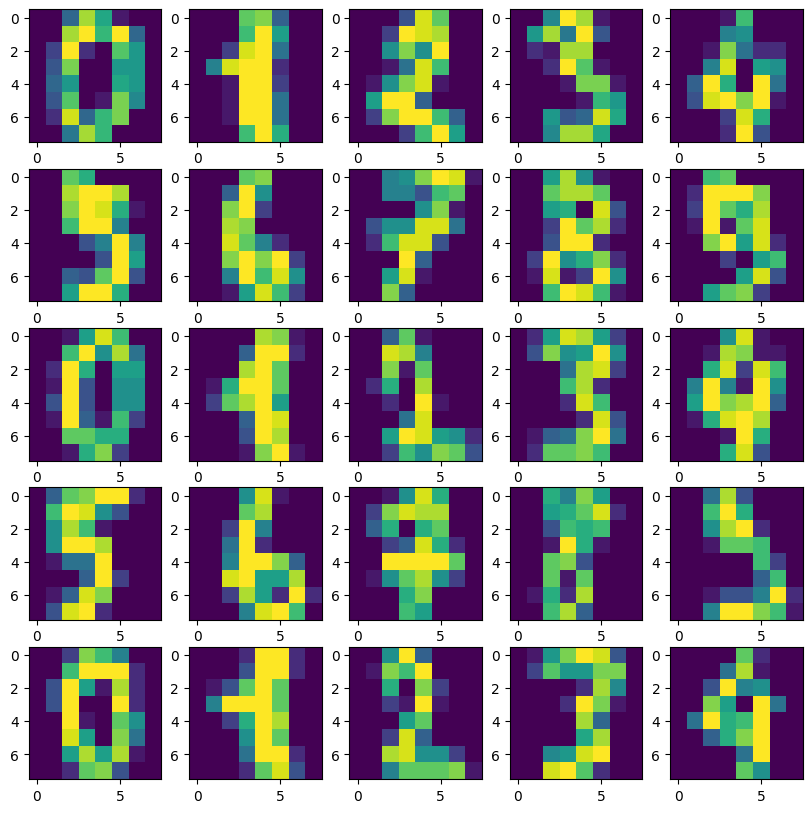

In [65]:
fig, axs = plt.subplots(5, 5, figsize=(10, 10)) # create a plot with 5x5 subplots
axs = axs.flatten()
for i in range(25):
    ax = axs[i]
    ax.imshow(data[i])

# Pandas

**pandas** is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool [[1]](https://pandas.pydata.org/).

In [37]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame

df # this is a pandas DataFrame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Often, we can think of the `DataFrame` as a dictionary of column names and the corresponding column values:

In [38]:
df['HouseAge'] # get the 'HouseAge' column

0        41.0
1        21.0
2        52.0
3        52.0
4        52.0
         ... 
20635    25.0
20636    18.0
20637    17.0
20638    18.0
20639    16.0
Name: HouseAge, Length: 20640, dtype: float64

In [39]:
sliced_df = df[['HouseAge', 'Population']] # pass a *list* of strings to slice out multiple columns
sliced_df

,HouseAge,Population
0,41.0,322.0
1,21.0,2401.0
2,52.0,496.0
3,52.0,558.0
4,52.0,565.0
...,...,...
20635,25.0,845.0
20636,18.0,356.0
20637,17.0,1007.0
20638,18.0,741.0


In [40]:
sliced_df.to_numpy() # we can easily convert DataFrames to numpy arrays

array([[  41.,  322.],
       [  21., 2401.],
       [  52.,  496.],
       ...,
       [  17., 1007.],
       [  18.,  741.],
       [  16., 1387.]], shape=(20640, 2))

With `df.iloc`, you can slice a DataFrame like a numpy array

In [41]:
df.iloc[:10, 2:5] # gets the first 10 rows and columns with index 2, 3, 4

,AveRooms,AveBedrms,Population
0,6.984127,1.023810,322.0
1,6.238137,0.971880,2401.0
2,8.288136,1.073446,496.0
3,5.817352,1.073059,558.0
4,6.281853,1.081081,565.0
5,4.761658,1.103627,413.0
6,4.931907,0.951362,1094.0
7,4.797527,1.061824,1157.0
8,4.294118,1.117647,1206.0
9,4.970588,0.990196,1551.0


`DataFrames` support a `numpy`-like API:

In [13]:
df.mean(axis=0) # mean per column (default)

MedInc            3.870671
HouseAge         28.639486
AveRooms          5.429000
AveBedrms         1.096675
Population     1425.476744
AveOccup          3.070655
Latitude         35.631861
Longitude      -119.569704
MedHouseVal       2.068558
dtype: float64

In [14]:
df.max(axis=1) # max value per row

0         322.0
1        2401.0
2         496.0
3         558.0
4         565.0
          ...  
20635     845.0
20636     356.0
20637    1007.0
20638     741.0
20639    1387.0
Length: 20640, dtype: float64